# Text Generation using GPT2

Project Description: Generate text using GPT models
Author:
    - Santosh Yadaw
    - santoshyadawprl@gmail.com

In [1]:
# Imports
import os
import re
import string
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from tqdm.auto import tqdm
from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

tqdm.pandas()

In [2]:
# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging

In [3]:
# Constants
HOME_PATH = os.path.split(os.getcwd())[0]
logger.info(f"HOME_PATH: {HOME_PATH}")
DATA_PATH = os.path.join(HOME_PATH,"data", "raw", "task2.csv")
logger.info(f"DATA_PATH: {DATA_PATH}")

INFO:root:HOME_PATH: /home/jupyter/text-gen
INFO:root:DATA_PATH: /home/jupyter/text-gen/data/raw/task2.csv


## 1. Setup Data

In [4]:
# Load Data
data = pd.read_csv(DATA_PATH, encoding="ISO-8859-1")
data = data.T.reset_index().T.reset_index(drop=True).rename(columns={0: "text"})
data.head()

,text
0,This product so far has not disappointed. My c...
1,great for beginner or experienced person. Boug...
2,Inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...
4,I bought this for my grand daughter when she c...


## 2. EDA
- Character count
- Word count
- Mean word length
- Mean Sentence Length
- Term Frequency Analysis

### 2a. Character Count

In [5]:
# Add character count
data['Length'] = data['text'].str.len()

### 2b. Word Count

In [6]:
def word_count(text_data):
    text_data_list = text_data.split()
    return len(text_data_list)

In [7]:
# Add word count
data['Word_count'] = data['text'].apply(word_count)

### 2c. Mean word length

In [8]:
# Add average word length
data['mean_word_length'] = data['text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))

In [9]:
data

,text,Length,Word_count,mean_word_length
0,This product so far has not disappointed. My c...,143,27,4.333333
1,great for beginner or experienced person. Boug...,75,14,4.428571
2,Inexpensive tablet for him to use and learn on...,131,26,4.076923
3,I've had my Fire HD 8 two weeks now and I love...,593,117,4.076923
4,I bought this for my grand daughter when she c...,613,117,4.247863
...,...,...,...,...
67986,I got 2 of these for my 8 yr old twins. My 11 ...,116,29,3.034483
67987,I bought this for my niece for a Christmas gif...,83,18,3.666667
67988,"Very nice for light internet browsing, keeping...",317,57,4.578947
67989,This Tablet does absolutely everything I want!...,241,43,4.627907


### 2d. Mean Sentence Length

In [10]:
data['mean_sent_length'] = data['text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))

In [11]:
data

,text,Length,Word_count,mean_word_length,mean_sent_length
0,This product so far has not disappointed. My c...,143,27,4.333333,71.000000
1,great for beginner or experienced person. Boug...,75,14,4.428571,37.000000
2,Inexpensive tablet for him to use and learn on...,131,26,4.076923,65.000000
3,I've had my Fire HD 8 two weeks now and I love...,593,117,4.076923,147.500000
4,I bought this for my grand daughter when she c...,613,117,4.247863,101.333333
...,...,...,...,...,...
67986,I got 2 of these for my 8 yr old twins. My 11 ...,116,29,3.034483,38.000000
67987,I bought this for my niece for a Christmas gif...,83,18,3.666667,83.000000
67988,"Very nice for light internet browsing, keeping...",317,57,4.578947,78.500000
67989,This Tablet does absolutely everything I want!...,241,43,4.627907,59.500000


In [12]:
def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=data[col])
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sns.kdeplot(data[col])
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

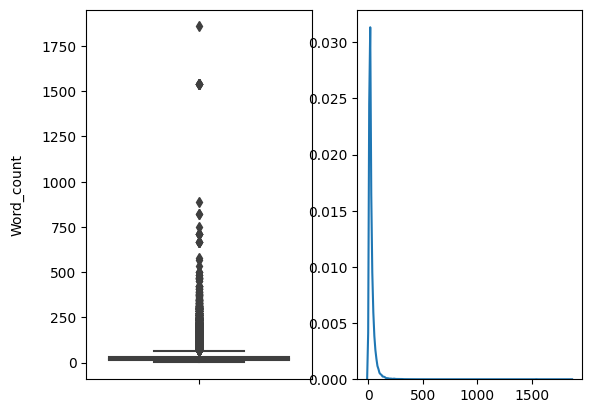

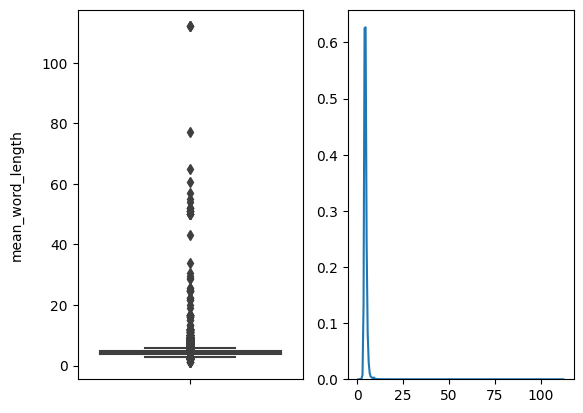

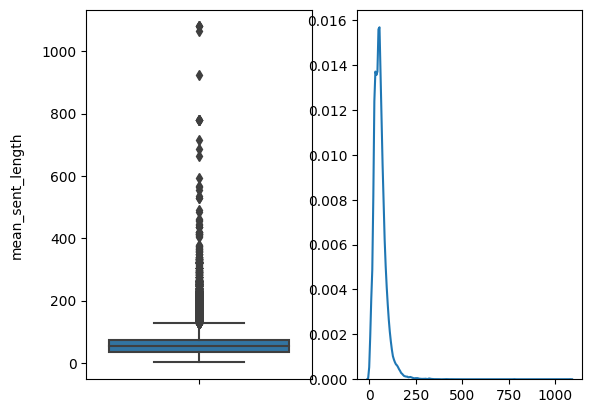

In [13]:
features = data.columns.tolist()[2:]
for feature in features:
    visualize(feature)

### 2e. Term Frequency Analysis

In [14]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

def corpus(text):
    text_list = text.split()
    return text_list

In [15]:
data['text'] = data['text'].progress_apply(clean)

  0%|          | 0/67991 [00:00<?, ?it/s]

In [16]:
data['text_lists'] = data['text'].progress_apply(corpus)

  0%|          | 0/67991 [00:00<?, ?it/s]

In [17]:
corpus = []
for i in trange(data.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['text_lists'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 67991/67991 [00:00<00:00, 186060.01it/s]


995570

In [18]:
mostCommon = Counter(corpus).most_common(20)
mostCommon

[('great', 22674),
 ('tablet', 16835),
 ('use', 13096),
 ('good', 11504),
 ('love', 11191),
 ('amazon', 10068),
 ('easy', 9859),
 ('price', 9738),
 ('bought', 9006),
 ('kindle', 8912),
 ('one', 8498),
 ('batteries', 8074),
 ('fire', 7423),
 ('like', 6843),
 ('product', 6043),
 ('would', 5720),
 ('kids', 5695),
 ('well', 5376),
 ('loves', 5357),
 ('get', 5201)]

In [19]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

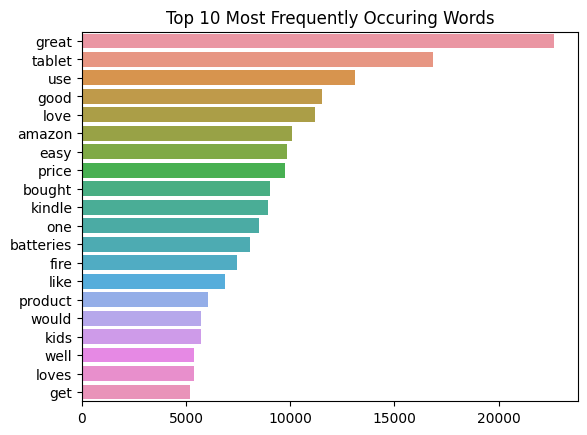

In [20]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

### Observations:
 - Dataset seems to be on amazon product reviews regarding tablets
 - General sentiments seems to indicate majority of the reviews contains positive sentiments words like great and love. Also they seem to talk about the price

### 2f. Most frequently occuring ngrams

In [21]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['text'])

In [22]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

MemoryError: Unable to allocate 145. GiB for an array with shape (67991, 285510) and data type int64

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [ ]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['Review'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

In [5]:
# Preprocessing

In [6]:
# Train Test Split

In [7]:
# Model Fine Tuning

In [8]:
# Evaluation

In [9]:
# Summary